<a href="https://colab.research.google.com/github/T-Schwab/QM2/blob/main/GDW_Dams_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

In [2]:
df = pd.read_csv("GDW_barriers_v1_0_FORME.csv")

# Print the first few rows of the DataFrame
print(df.head())

   GDW_ID         RES_NAME             DAM_NAME        ALT_NAME  \
0       1    Lake Winnipeg               Jenpeg      Split Lake   
1       2          Ontario             Iroquois             NaN   
2       3           Baikal              Irkutsk             NaN   
3       4    Lake Victoria           Owen Falls             NaN   
4       5  Southern Indian  Missi Falls Control  Notigi Control   

           DAM_TYPE LAKE_CTRL         RIVER ALT_RIVER MAIN_BASIN  \
0  Lake Control Dam       Yes        Nelson       NaN        NaN   
1  Lake Control Dam       Yes  St. Lawrence       NaN        NaN   
2  Lake Control Dam       Yes        Angara       NaN        NaN   
3  Lake Control Dam       Yes    White Nile       NaN       Nile   
4  Lake Control Dam       Yes     Churchill       Rat        NaN   

       SUB_BASIN  ...    LAT_RIV LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  \
0            NaN  ...  53.696359      NaN     NaN    GRanD   CanVec      709   
1            NaN  ...  44.48

<ipython-input-2-7aa62ca82576>:1: DtypeWarning: Columns (1,3,5,7,8,9,11,15,21,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("GDW_barriers_v1_0_FORME.csv")


In [3]:
# List of African countries
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cameroon", "Central African Republic", "Republic of the Congo",
    "Democratic Republic of the Congo", "Egypt",
    "Eritrea", "Ethiopia", "Gabon", "Ghana", "Guinea", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
   "Senegal", "Sierra Leone", "Somalia", "South Africa",
   "Sudan", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Swaziland"
]

# Filter the DataFrame to only include African countries
df_africa = df[df['COUNTRY'].isin(african_countries)]

# Display the filtered DataFrame
print(df_africa)


       GDW_ID       RES_NAME            DAM_NAME             ALT_NAME  \
3           4  Lake Victoria          Owen Falls                  NaN   
58         59    Lake Nasser      High Aswan Dam                  NaN   
59         60         Kainji              Kainji                  NaN   
60         61          Volta   Akosombo Main Dam  Akosombo Saddle Dam   
61         62   Cahora Bassa        Cahora Bassa         Cabora Bassa   
...       ...            ...                 ...                  ...   
41050   41051            NaN        Applethwaite                  NaN   
41051   41052            NaN                 NaN                  NaN   
41052   41053            NaN  Middle Kruisvallei                  NaN   
41053   41054            NaN   Lower Kruisvallei                  NaN   
41054   41055            NaN                 NaN                  NaN   

               DAM_TYPE LAKE_CTRL       RIVER ALT_RIVER            MAIN_BASIN  \
3      Lake Control Dam       Yes  White N

In [4]:
df_africa['YEAR_DAM'] = pd.to_numeric(df_africa['YEAR_DAM'], errors='coerce')
df_africa = df_africa.sort_values(by='YEAR_DAM')
print(df_africa)

       GDW_ID RES_NAME                         DAM_NAME  \
24124   24125      NaN                              NaN   
24654   24655      NaN                              NaN   
23629   23630      NaN                              NaN   
23628   23629      NaN                              NaN   
24656   24657      NaN                              NaN   
...       ...      ...                              ...   
7409     7410      NaN                  Genale-Dawa III   
40397   40398      NaN  Grand Ethiopian Renaissance Dam   
7418     7419      NaN                            Lauca   
7377     7378      NaN                       Draa Ediss   
7412     7413      NaN                         Souapiti   

                                        ALT_NAME DAM_TYPE LAKE_CTRL  \
24124                                        NaN      Dam       NaN   
24654                                        NaN      Dam       NaN   
23629                                        NaN      Dam       NaN   
23628  

<ipython-input-4-3a3b76757a51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['YEAR_DAM'] = pd.to_numeric(df_africa['YEAR_DAM'], errors='coerce')


     YEAR_DAM  count
0        1901      1
1        1902      1
2        1905      1
3        1907      1
4        1908      1
..        ...    ...
98       2016     12
99       2017      6
100      2018      3
101      2020      3
102      2021      2

[103 rows x 2 columns]


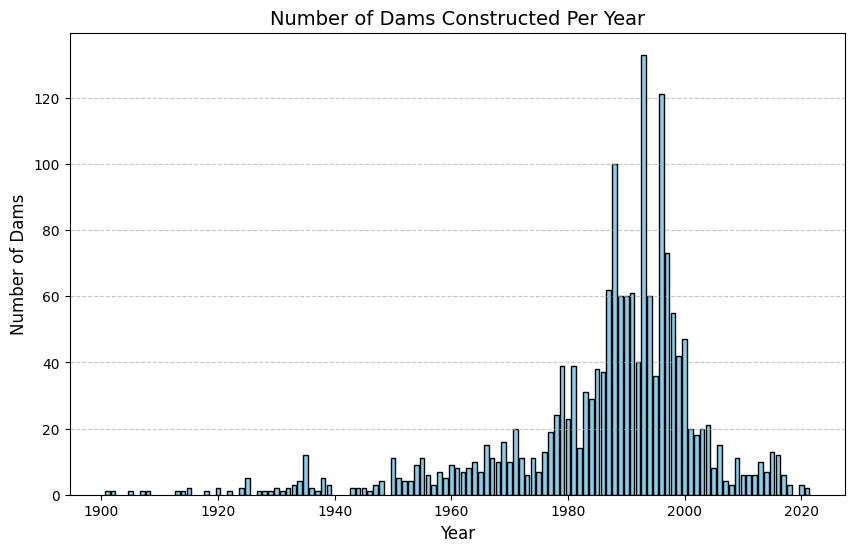

In [5]:
df_africa = df_africa[df_africa['YEAR_DAM'] >= 1900]

yearly = df_africa.groupby('YEAR_DAM').size().reset_index(name='count')
print(yearly)

plt.figure(figsize=(10, 6))
plt.bar(yearly['YEAR_DAM'], yearly['count'], color='skyblue', edgecolor='black')
plt.title('Number of Dams Constructed Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dams', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
gdf = gpd.read_file("GDW_barriers_v1_0.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   GDW_ID         RES_NAME             DAM_NAME        ALT_NAME  \
0       1    Lake Winnipeg               Jenpeg      Split Lake   
1       2          Ontario             Iroquois            None   
2       3           Baikal              Irkutsk            None   
3       4    Lake Victoria           Owen Falls            None   
4       5  Southern Indian  Missi Falls Control  Notigi Control   

           DAM_TYPE LAKE_CTRL         RIVER ALT_RIVER MAIN_BASIN  \
0  Lake Control Dam       Yes        Nelson      None       None   
1  Lake Control Dam       Yes  St. Lawrence      None       None   
2  Lake Control Dam       Yes        Angara      None       None   
3  Lake Control Dam       Yes    White Nile      None       Nile   
4  Lake Control Dam       Yes     Churchill       Rat       None   

       SUB_BASIN  ... LONG_DAM LAT_DAM ORIG_SRC POLY_SRC GRAND_ID  HYRIV_ID  \
0           None  ...      0.0     0.0    GRanD   CanVec      709  70125969   
1           None  ...      0.0

In [9]:
import geopandas as gpd
from shapely.geometry import Point

# Step 1: Create a geometry column using LONG_RIV and LAT_RIV
df_africa['geometry'] = df_africa.apply(lambda row: Point(row['LONG_RIV'], row['LAT_RIV']), axis=1)

# Step 2: Convert the DataFrame to a GeoDataFrame
gdf_coords = gpd.GeoDataFrame(df_africa, geometry='geometry')

# Step 3: Set a coordinate reference system (CRS) for the GeoDataFrame
# For latitude and longitude, use EPSG:4326 (WGS 84)
gdf_coords.set_crs(epsg=4326, inplace=True)

# Step 4: Verify the result
print(gdf_coords.head())



      GDW_ID RES_NAME        DAM_NAME ALT_NAME DAM_TYPE LAKE_CTRL  \
6655    6656      NaN         Matopos   Matobo      Dam       NaN   
7277    7278      NaN  Assiut Barrage      NaN      Dam       NaN   
6727    6728      NaN        Gerrands      NaN      Dam       NaN   
6701    6702      NaN    Premier Mine      NaN      Dam       NaN   
5427    5428      NaN         Bonkolo      NaN      Dam       NaN   

              RIVER ALT_RIVER          MAIN_BASIN  SUB_BASIN  ... LONG_DAM  \
6655         Maleme       NaN             Limpopo     Shashe  ...      NaN   
7277           Nile       NaN                Nile        NaN  ...      NaN   
6727  Gerrandspruit       NaN              Orange       Vaal  ...      NaN   
6701          Wilge       NaN             Limpopo  Elefantes  ...      NaN   
5427        Bonkolo       NaN  Indian Ocean Coast  Groot Kei  ...      NaN   

     LAT_DAM ORIG_SRC     POLY_SRC GRAND_ID  HYRIV_ID  INSTREAM  HYLAK_ID  \
6655     NaN    GRanD         SWBD     

In [18]:
%%capture
!pip install Basemap
!pip install ipyleaflet

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point

# Step 1: Load the dam data and filter for Africa
# Filter for Africa and create geometry for dam locations
# Assuming 'LAT_RIV' and 'LONG_RIV' represent latitude and longitude
df_africa = df.loc[df['COUNTRY'].isin(african_countries)].copy()
df_africa['geometry'] = df_africa.apply(lambda row: Point(row['LONG_RIV'], row['LAT_RIV']), axis=1)
gdf_coords = gpd.GeoDataFrame(df_africa, geometry='geometry')

# Step 2: Load the catchment shapefile
gdf_catchments = gpd.read_file("GDW_barriers_v1_0.shp")

# Filter to include only catchments in Africa
africa_boundary = gdf_catchments[gdf_catchments['COUNTRY'].isin(african_countries)]

# Clip catchment areas to Africa's boundaries
gdf_catchments_africa = gpd.clip(gdf_catchments, africa_boundary)

# Step 3: Set up the Basemap
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
m = Basemap(
    projection='merc',
    llcrnrlon=-25, urcrnrlon=60,  # Longitude range
    llcrnrlat=-40, urcrnrlat=40,  # Latitude range
    resolution='i', ax=ax
)

# Draw map features
m.drawcoastlines(color='black', linewidth=0.5)
m.drawcountries(color='black', linewidth=0.5)

# Step 4: Filter only Polygon and MultiPolygon geometries
gdf_catchments_africa = gdf_catchments_africa[gdf_catchments_africa.geometry.type.isin(['Polygon', 'MultiPolygon'])]

# Step 5: Plot the clipped catchment areas
for _, row in gdf_catchments_africa.iterrows():
    if row.geometry.type == 'Polygon':
        # Single Polygon
        x, y = m(*zip(*list(row.geometry.exterior.coords)))  # Transform exterior coordinates
        ax.fill(x, y, facecolor='blue', alpha=0.4, edgecolor='blue', label="Catchment Areas")
    elif row.geometry.type == 'MultiPolygon':
        # MultiPolygon: Iterate through each part
        for polygon in row.geometry.geoms:
            x, y = m(*zip(*list(polygon.exterior.coords)))  # Transform exterior coordinates
            ax.fill(x, y, facecolor='blue', alpha=0.4, edgecolor='blue', label="Catchment Areas")

# Step 5: Plot the dam locations
dam_lons = gdf_coords['LONG_RIV'].values
dam_lats = gdf_coords['LAT_RIV'].values
dam_x, dam_y = m(dam_lons, dam_lats)  # Transform latitude/longitude to map coordinates
m.scatter(dam_x, dam_y, color='red', edgecolor='black', marker='o', s=10, label="Dams")

# Step 6: Add title and legend
plt.title("Dams Constructed in Africa (GDW Database)", fontsize=16)
plt.legend(loc="upper right", fontsize=10)

# Save the figure
output_path = "africa_GDWdam_GDWcatchments.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()